In [392]:
import numpy as np
import seaborn as sns

#install for latex PDF export:
#sudo tlmgr install adjustbox
#sudo tlmgr install collectbox
#sudo tlmgr install ucs
#sudo tlmgr install collection-fontsrecommended

%matplotlib inline
REL_TYPES = np.arange(-1, 1+2/16, 2/16)

## Create sample n * n matrix with REL_TYPE samples

In [385]:
def sample_matrix(n = 5):
    m = np.random.choice(REL_TYPES, size=(n, n))
    m = np.tril(m) + np.tril(m).T
    np.fill_diagonal(m, 0)
    return m

In [386]:
m = sample_matrix(5)
m

array([[ 0.   , -0.25 ,  0.125, -0.75 ,  0.375],
       [-0.25 ,  0.   , -0.75 ,  0.5  ,  0.   ],
       [ 0.125, -0.75 ,  0.   ,  0.75 , -0.5  ],
       [-0.75 ,  0.5  ,  0.75 ,  0.   ,  0.25 ],
       [ 0.375,  0.   , -0.5  ,  0.25 ,  0.   ]])

## F91 algorithm
Pass in
1. g = **None**: all relations as matrix
2. g = **int** (index): relations at given index g

In [387]:
def f91(rels, g=None):
    if g == None:
        return [f91(rels, x) for x in range(len(rels))]
    elif type(g) == int:
        return [g] + [x for x in np.argsort(-rels[g]) if x != g]

In [389]:
mi = f91(m)
mi

[[0, 4, 2, 1, 3],
 [1, 3, 4, 0, 2],
 [2, 3, 0, 4, 1],
 [3, 2, 1, 4, 0],
 [4, 0, 3, 1, 2]]

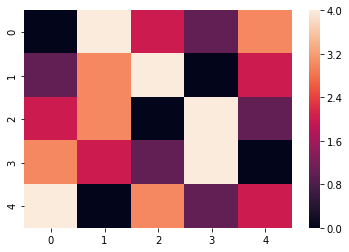

In [393]:
sns.heatmap(mi)